In [ ]:
#Python Project 1
 #Twitter Stock Market Analysis

import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.templates.default="plotly_white"



In [ ]:

#Task1
#1)	Read the data and display the first 100 rows from the data
data = pd.read_excel('/content/TWTR.xlsx')
data.head(100)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0
...,...,...,...,...,...,...,...
95,2014-03-27,45.090000,46.400002,43.310001,46.320000,46.320000,15507597.0
96,2014-03-28,46.650002,47.340000,45.700001,47.299999,47.299999,9610491.0
97,2014-03-31,47.549999,47.750000,46.430000,46.669998,46.669998,5794497.0
98,2014-04-01,46.709999,47.590000,46.180000,46.980000,46.980000,6916147.0


In [ ]:
#2)	Give the column insights
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2264 non-null   datetime64[ns]
 1   Open       2259 non-null   float64       
 2   High       2259 non-null   float64       
 3   Low        2259 non-null   float64       
 4   Close      2259 non-null   float64       
 5   Adj Close  2259 non-null   float64       
 6   Volume     2259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.9 KB


In [ ]:
#3)	Check whether this dataset contains any null values or not if it is there then remove the null values from it

data.isnull().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

In [ ]:
data= data.dropna()

data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#4)	Find the statistical description of the data.

data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2259,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2.259000e+03
mean,2018-05-04 20:18:48.286852608,36.020286,36.699881,35.339465,36.003625,36.003625,2.175186e+07
min,2013-11-07 00:00:00,13.950000,14.220000,13.725000,14.010000,14.010000,0.000000e+00
25%,2016-02-06 12:00:00,25.550000,26.215001,24.912501,25.410000,25.410000,1.233530e+07
50%,2018-05-04 00:00:00,35.419998,36.099998,34.820000,35.490002,35.490002,1.691305e+07
75%,2020-08-01 12:00:00,44.205000,45.015000,43.327501,44.135000,44.135000,2.428082e+07
max,2022-10-27 00:00:00,78.360001,80.750000,76.050003,77.629997,77.629997,2.692131e+08
std,NaN,14.118463,14.372057,13.828724,14.089989,14.089989,1.909988e+07


In [ ]:
#5)	Find the missing values in the data

data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2254,False,False,False,False,False,False,False
2255,False,False,False,False,False,False,False
2256,False,False,False,False,False,False,False
2257,False,False,False,False,False,False,False


In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2254    False
2255    False
2256    False
2257    False
2258    False
Length: 2259, dtype: bool

In [ ]:
#Task 2
#6)	Give me the Z-test O/R T-test over High, low, and close columns and see if the null hypothesis gets rejected or accepted

import statistics as st
from statsmodels.stats import weightstats as stests
from numpy import random

high = data["High"]
print(" High Data:",high)

high_mean = st.mean(high)
print("Mean of the high columns",high_mean)

high_stdev = st.stdev(high)
print("stdandard deviation of data",high_stdev)

ztest,pval = stests.ztest(high, value=30)
print("ztest score:",ztest)
print("p-value :",pval)

if pval < 0.05:
 print("Reject Null hypothesis ")

else:
 print("Accept the null hypothesis")




 High Data: 0       50.090000
1       46.939999
2       43.000000
3       43.779999
4       42.869999
          ...    
2254    50.750000
2255    51.860001
2256    53.180000
2257    53.500000
2258    54.000000
Name: High, Length: 2259, dtype: float64
Mean of the high columns 36.69988069278442
stdandard deviation of data 14.372056692309659
ztest score: 22.15676048174423
p-value : 8.978177265940086e-109
Reject Null hypothesis 


In [ ]:
#low coloumns
low = data["Low"]
print(" Low Data:",low)

low_mean = st.mean(low)
print("Mean of the low columns",low_mean)

low_stdev = st.stdev(low)
print("stdandard deviation of data",low_stdev)

ztest,pval = stests.ztest(low, value=30)
print("ztest score:",ztest)
print("p-value :",pval)

if pval < 0.05:
 print("Reject Null hypothesis ")

else:
 print("Accept the null hypothesis")

 Low Data: 0       44.000000
1       40.685001
2       39.400002
3       41.830002
4       40.759998
          ...    
2254    49.549999
2255    50.520000
2256    52.200001
2257    52.770000
2258    53.700001
Name: Low, Length: 2259, dtype: float64
Mean of the low columns 35.339464800354136
stdandard deviation of data 13.828723572649182
ztest score: 18.35159210972168
p-value : 3.205795428365976e-75
Reject Null hypothesis 


In [ ]:
#close coloumns
#ztest
close = data["Close"]
print(" Close Data:",close)

close_mean = st.mean(close)
print("Mean of the close columns",close_mean)

close_stdev = st.stdev(close)
print("stdandard deviation of data",close_stdev)

ztest,pval = stests.ztest(close, value=30)
print("ztest score:",ztest)
print("p-value :",pval)

if pval < 0.05:
 print("Reject Null hypothesis ")

else:
 print("Accept the null hypothesis")


 Close Data: 0       44.900002
1       41.650002
2       42.900002
3       41.900002
4       42.599998
          ...    
2254    49.889999
2255    51.520000
2256    52.779999
2257    53.349998
2258    53.700001
Name: Close, Length: 2259, dtype: float64
Mean of the close columns 36.00362549048251
stdandard deviation of data 14.08998893401524
ztest score: 20.251679995652125
p-value : 3.433291673809823e-91
Reject Null hypothesis 


In [ ]:
#7)	By using ANOVA find the Fvalue and Pvalue from the data and see its Acceptance and rejection of the Null hypothesis.

import scipy.stats as ssf

grp1 = data['High']
grp2 = data['Low']
grp1.head()
grp2.head()

F_val,P_val= ssf.f_oneway(grp1,grp2)
print("F_value :",F_val)
print("P_value :",P_val)

if P_val <0.05:
  print("Reject Null Hypothesis")

else:
  print("Accept the Null Hypothesis")




F_value : 10.510084066032649
P_value : 0.0011958722702637046
Reject Null Hypothesis


In [ ]:
#8)	Check if the data is dependent or independent by using the chi-square method.
#Dependent - Reject the Null hypothesis

#Independent- Accept the Null Hypothesis

datas = {"High":data['High'],
         "Low":data['Low']}
#Print(chisq)

chisq,p_val = ssf.chisquare(datas["Low"])
alpha=0.05

print("chisquare :",chisq)
print("P_value :",p_val)

if p_val < alpha:
  print("Dependent")
else:
  print("Independent")



chisquare : 12218.788864355833
P_value : 0.0
Dependent


In [ ]:
#10)	Write the insights which you have got  from the above  tests
#In the previous test we don't find statistic diffrence .we perfrom some oprations on data to find ztest, chisquare and other remaining things
#I understand the null hypothesis concept.

In [ ]:
#TASK 3
#11)	Show the Twitter stock prices over the years  and give a conclusion.
figure = go.Figure(data = [go.Candlestick(
    x= data['Date'],
    open = data['Open'],
    high = data['High'],
    low = data['Low'],
    close = data['Close']
)])
figure.update_layout(
    title= "Twitter Stock Market Prices over the Years",
    xaxis_rangeslider_visible = False
)

figure.show()

In [ ]:
#12)	Now compare the close vs date column for Twitter prices over the years.

figure = px.bar(data, x = "Date",y = "Close",color = "Close")

figure.update_xaxes(rangeslider_visible= True)

figure.show()

In [ ]:
#13)	Assign buttons to control time periods.  Add the  buttons to analyze the stock prices of Twitter in different time periods:

figure = px.bar(data , x = "Date" ,y = "Close" , color = "Close")

figure.update_xaxes(rangeslider_visible = True)

figure.update_layout(
    title = "Twitter Stock Prices Over the Years"
)

figure.update_xaxes(

        rangeselector = dict(

                  buttons = list([

                                  dict(count = 1 , label= '1m' , step = "month" , stepmode = "backward"),
                                  dict(count = 6 , label= '6m' , step = "month" , stepmode = "backward"),
                                  dict(count = 3 , label= '3m' , step = "month" , stepmode = "backward"),
                                  dict(count = 1 , label= '1y' , step = "year" , stepmode = "backward"),
                                  dict(count = 2 , label= '2y' , step = "year" , stepmode = "backward"),
                                  dict(step = 'all'),


                  ])
        )
)

figure.show()

In [ ]:
#14)	Give the complete timeline of Twitter in the stock market. (Line Graph)
data ['Date']= pd.to_datetime(data["Date"], format= '%y- %m- %d')

data['Year'] = data['Date'].dt.year

data['Month'] = data['Date'].dt.month

fig = px.line(data,
              x="Month",
              y="Close",
              color='Year',
              title="Complete timeline of Twitter")
fig.show()

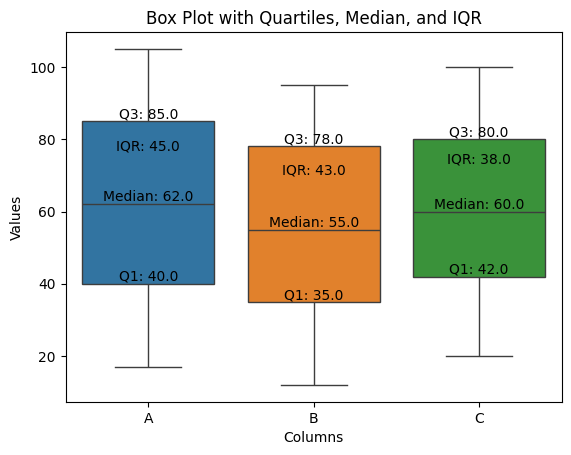

In [ ]:
#15)Show the quartile, inter-quartile Lower, Median, and Upper Quartile on the given dataset  you can use any three columns for that (Box-Plot)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'A': [17, 25, 40, 50, 62, 70, 85, 92, 105],
    'B': [12, 22, 35, 45, 55, 65, 78, 88, 95],
    'C': [20, 30, 42, 52, 60, 68, 80, 90, 100]
}

df = pd.DataFrame(data)


sns.boxplot(data=df)


for i in range(3):
    quartiles = df.iloc[:, i].quantile([0.25, 0.5, 0.75])
    plt.text(i, quartiles[0.25], f'Q1: {quartiles[0.25]}', verticalalignment='bottom', horizontalalignment='center')
    plt.text(i, quartiles[0.5], f'Median: {quartiles[0.5]}', verticalalignment='bottom', horizontalalignment='center')
    plt.text(i, quartiles[0.75], f'Q3: {quartiles[0.75]}', verticalalignment='bottom', horizontalalignment='center')
    plt.text(i, quartiles[0.75] - (quartiles[0.75] - quartiles[0.25]) * 0.2, f'IQR: {quartiles[0.75] - quartiles[0.25]}', verticalalignment='bottom', horizontalalignment='center')

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot with Quartiles, Median, and IQR')
plt.show()




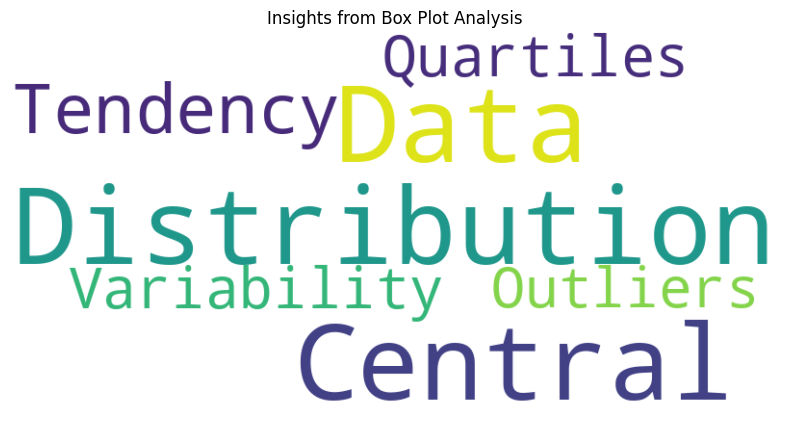

In [ ]:
#16)	Give the insights for the above analysis and make a word cloud for that analysis.

from wordcloud import WordCloud
import matplotlib.pyplot as plt


insights = """
1. Distribution of Data
2. Central Tendency
3. Variability
4. Quartiles
5. Outliers
"""

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(insights)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Insights from Box Plot Analysis')
plt.axis('off')
plt.show()
